In [1]:
from scipy import stats
from scipy.stats import skew,norm  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import scipy.stats as stats


#Visualizing tools
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing tools
import pandas as pd
import numpy as np

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

#ML Algoirthm
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
import sklearn.linear_model as linear_model
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [95]:
ttrain = pd.read_csv('Train.csv')
ttest = pd.read_csv('Test.csv')

In [3]:
fin_data = pd.concat([ttrain,ttest]).reset_index(drop=True)

In [4]:
fin_data.head()

,ID,created_at,site,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road,ref_pm2_5
0,ID_0038MG0B,2020-04-23 17:00:00+03:00,USEmbassy,6.819048,7.313810,6.794048,7.838333,0.807417,22.383333,0.299255,32.592686,1199,4374,21,14,6834,130,25.0
1,ID_008ASVDD,2020-02-23 19:00:00+03:00,USEmbassy,57.456047,67.883488,55.643488,70.646977,0.712417,25.350000,0.299255,32.592686,1199,4374,21,14,6834,130,68.0
2,ID_009ACJQ9,2021-01-23 04:00:00+03:00,Nakawa,170.009773,191.153636,165.308636,191.471591,0.907833,20.616667,0.331740,32.609510,1191,5865,31,-11,4780,500,149.7
3,ID_00IGMAQ2,2019-12-04 09:00:00+03:00,USEmbassy,49.732821,61.512564,0.000000,0.000000,0.949667,21.216667,0.299255,32.592686,1199,4374,21,14,6834,130,54.0
4,ID_00P76VAQ,2019-10-01 01:00:00+03:00,USEmbassy,41.630455,51.044545,41.725000,51.141364,0.913833,18.908333,0.299255,32.592686,1199,4374,21,14,6834,130,39.0


In [5]:
# fin_data.isnull().sum()

In [6]:
#fin_data[fin_data['temp'].isnull()]

In [7]:
fin_data['temp'] = fin_data['temp'].fillna(fin_data['temp'].mean())
fin_data['humidity'] = fin_data['humidity'].fillna(fin_data['humidity'].mean())

In [8]:
# plt.hist(fin_data.dist_major_road)

In [9]:
# Create the Paid_Job column filled with zeros
fin_data['dist'] = 0

# Replace all the distance values with 0s and 1s
fin_data.loc[fin_data['dist_major_road'] < 450, 'dist'] = 0
fin_data.loc[fin_data['dist_major_road'] > 450, 'dist'] = 1

# Print the first five rows of the columns
print(fin_data[['dist', 'dist_major_road']].head())

   dist  dist_major_road
0     0              130
1     0              130
2     1              500
3     0              130
4     0              130


(array([2146.,    0.,    0.,    0.,    0., 7635.,    0.,    0.,    0.,
        3884.]),
 array([4780. , 5153.8, 5527.6, 5901.4, 6275.2, 6649. , 7022.8, 7396.6,
        7770.4, 8144.2, 8518. ]),
 <a list of 10 Patch objects>)

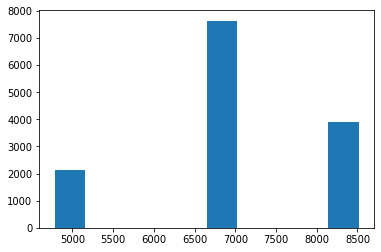

In [10]:
plt.hist(fin_data.population)

In [11]:
fin_data['population'][(fin_data['population'] < 6000)] = 0
fin_data['population'][(fin_data['population'] >= 6500) & (fin_data['population'] <= 7500)] = 1
fin_data['population'][(fin_data['population'] > 8000)] = 2

C:\Users\Osuntoki\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Osuntoki\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Osuntoki\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel pac

In [12]:
fin_data.head()

,ID,created_at,site,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road,ref_pm2_5,dist
0,ID_0038MG0B,2020-04-23 17:00:00+03:00,USEmbassy,6.819048,7.313810,6.794048,7.838333,0.807417,22.383333,0.299255,32.592686,1199,4374,21,14,1,130,25.0,0
1,ID_008ASVDD,2020-02-23 19:00:00+03:00,USEmbassy,57.456047,67.883488,55.643488,70.646977,0.712417,25.350000,0.299255,32.592686,1199,4374,21,14,1,130,68.0,0
2,ID_009ACJQ9,2021-01-23 04:00:00+03:00,Nakawa,170.009773,191.153636,165.308636,191.471591,0.907833,20.616667,0.331740,32.609510,1191,5865,31,-11,0,500,149.7,1
3,ID_00IGMAQ2,2019-12-04 09:00:00+03:00,USEmbassy,49.732821,61.512564,0.000000,0.000000,0.949667,21.216667,0.299255,32.592686,1199,4374,21,14,1,130,54.0,0
4,ID_00P76VAQ,2019-10-01 01:00:00+03:00,USEmbassy,41.630455,51.044545,41.725000,51.141364,0.913833,18.908333,0.299255,32.592686,1199,4374,21,14,1,130,39.0,0


(array([2146., 7635.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3884.]),
 array([1191. , 1195.2, 1199.4, 1203.6, 1207.8, 1212. , 1216.2, 1220.4,
        1224.6, 1228.8, 1233. ]),
 <a list of 10 Patch objects>)

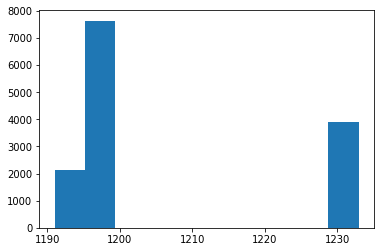

In [13]:
plt.hist(fin_data.altitude)

In [14]:
from pandas import DataFrame
from datetime import datetime
#fin_data['created_at']
ylit = []
mlit = []
for i,j in fin_data.iterrows():
    a = (j['created_at'][0:10])
    year = datetime.strptime(a, "%Y-%m-%d").year
    month = datetime.strptime(a, "%Y-%m-%d").month
    ylit.append(year)
    mlit.append(month)

ylit = DataFrame(ylit,columns=['year'])
mlit = DataFrame(mlit,columns=['month'])
fin_data = pd.concat([fin_data,ylit,mlit], axis = 1)
    

In [15]:
fin_data['population'][(fin_data['population'] < 6000)] = 0
fin_data['population'][(fin_data['population'] >= 6500) & (fin_data['population'] <= 7500)] = 1
fin_data['population'][(fin_data['population'] > 8000)] = 2

C:\Users\Osuntoki\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Osuntoki\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Osuntoki\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel pac

In [16]:
fin_data['altitude'][(fin_data['altitude'] == 1199)] = 'High'
fin_data['altitude'][(fin_data['altitude'] == 1233)] = 'Medium'
fin_data['altitude'][(fin_data['altitude'] == 1191)] = 'Low'

C:\Users\Osuntoki\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
fin_data['greenness'][(fin_data['greenness'] == 4374)] = 'Very'
fin_data['greenness'][(fin_data['greenness'] == 6340)] = 'Mild'
fin_data['greenness'][(fin_data['greenness'] == 5865)] = 'None'

C:\Users\Osuntoki\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
fin_data.head()

,ID,created_at,site,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,...,altitude,greenness,landform_90m,landform_270m,population,dist_major_road,ref_pm2_5,dist,year,month
0,ID_0038MG0B,2020-04-23 17:00:00+03:00,USEmbassy,6.819048,7.313810,6.794048,7.838333,0.807417,22.383333,0.299255,...,High,Very,21,14,0,130,25.0,0,2020,4
1,ID_008ASVDD,2020-02-23 19:00:00+03:00,USEmbassy,57.456047,67.883488,55.643488,70.646977,0.712417,25.350000,0.299255,...,High,Very,21,14,0,130,68.0,0,2020,2
2,ID_009ACJQ9,2021-01-23 04:00:00+03:00,Nakawa,170.009773,191.153636,165.308636,191.471591,0.907833,20.616667,0.331740,...,Low,None,31,-11,0,500,149.7,1,2021,1
3,ID_00IGMAQ2,2019-12-04 09:00:00+03:00,USEmbassy,49.732821,61.512564,0.000000,0.000000,0.949667,21.216667,0.299255,...,High,Very,21,14,0,130,54.0,0,2019,12
4,ID_00P76VAQ,2019-10-01 01:00:00+03:00,USEmbassy,41.630455,51.044545,41.725000,51.141364,0.913833,18.908333,0.299255,...,High,Very,21,14,0,130,39.0,0,2019,10


In [19]:
fin_data = pd.get_dummies(fin_data, columns=['site','greenness','altitude'])

In [20]:
fin_data.drop(['dist_major_road'], axis = 1, inplace = True)
fin_data.drop(['created_at'], axis = 1, inplace = True)

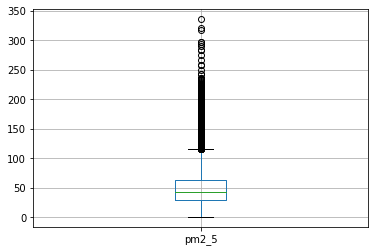

In [21]:
fin_data[['pm2_5']].boxplot()

In [22]:
numeric = fin_data.select_dtypes(include = 'number').columns
skew_features = fin_data[numeric].apply(lambda x: skew(x)).sort_values(ascending = False)

from pandas import DataFrame
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
print("There are {} numerical features with Skew > 0.5:".format(high_skew.shape[0]))
Skewness = pd.DataFrame({'Skew':high_skew})
Skewness.head()

There are 12 numerical features with Skew > 0.5:


,Skew
landform_90m,1.885195
altitude_Low,1.885195
greenness_None,1.885195
site_Nakawa,1.885195
pm2_5,1.879097


In [23]:
for column in skew_index:
    fin_data[column] = np.log1p(fin_data[column])

In [24]:
## LOG TRANSFORMATION IN PYTHON

from sklearn.preprocessing import PowerTransformer
log = PowerTransformer()
fin_data['pm2_5'] = log.fit_transform(fin_data[['pm2_5']])

In [88]:
split=train.shape[0]
train_df=fin_data[:split]
test_df=fin_data[split:]
test=test_df.drop(['ID'], axis =1)

In [26]:
X = train_df.drop(['ID'],axis =1)
y = train['ref_pm2_5']

In [27]:
import time
from sklearn import metrics
from sklearn.metrics import mean_squared_error,log_loss
from sklearn.model_selection import KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import lightgbm as lgb
import warnings

from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

from catboost import CatBoostRegressor

In [28]:
#pip install catboost==0.22

In [29]:
X = train_df.drop(['ID'],axis =1)
y = train_df['ref_pm2_5']
train_labels = y

In [30]:
train_labels.head()

0     25.0
1     68.0
2    149.7
3     54.0
4     39.0
Name: ref_pm2_5, dtype: float64

In [60]:
#df = pd.read_csv('SampleSubmission.csv')
#df['ref_pm2_5'] = cat_pred
#df.to_csv('FL3.csv', index = False)

In [52]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,log_loss

In [89]:
fold_score = 0
test_pred = []

n = 8
kf = StratifiedKFold(n)
kf = KFold(n_splits=2)
kf.get_n_splits(X)
  

for train_index, test_index in kf.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index)
    Xtrain, Xtest = X.loc[train_index], X.loc[test_index]
    ytrain, ytest = y[train_index], y[test_index]

    model = CatBoostRegressor(random_seed=34,bootstrap_type='Bayesian',max_depth=6,learning_rate=0.07,
                          iterations=2000,silent=True)
    model.fit(Xtrain, ytrain, eval_set=[(Xtest,ytest)], verbose=200)
    
    pred = model.predict(Xtest)
    score = mean_squared_error(ytest, pred)
    fold_score = fold_score + (score/n)
    print(fold_score)
    
    predictions = model.predict(test)
    test_pred.append(predictions)

0:	learn: 33.2552108	test: 33.4063157	best: 33.4063157 (0)	total: 5.98ms	remaining: 12s
200:	learn: 1.1000237	test: 3.2977620	best: 3.2977620 (200)	total: 1.09s	remaining: 9.76s
400:	learn: 0.6934692	test: 3.2790653	best: 3.2790531 (399)	total: 2.26s	remaining: 9.03s
600:	learn: 0.5303889	test: 3.2588441	best: 3.2587314 (599)	total: 3.2s	remaining: 7.45s
800:	learn: 0.4345409	test: 3.2491495	best: 3.2491495 (800)	total: 4.14s	remaining: 6.2s
1000:	learn: 0.3669075	test: 3.2419469	best: 3.2418702 (999)	total: 5.12s	remaining: 5.11s
1200:	learn: 0.3192851	test: 3.2380743	best: 3.2380186 (1188)	total: 6.07s	remaining: 4.04s
1400:	learn: 0.2836143	test: 3.2333922	best: 3.2333617 (1387)	total: 7.04s	remaining: 3.01s
1600:	learn: 0.2572066	test: 3.2305944	best: 3.2305328 (1598)	total: 8.24s	remaining: 2.05s
1800:	learn: 0.2335994	test: 3.2291173	best: 3.2290950 (1793)	total: 9.65s	remaining: 1.06s
1999:	learn: 0.2143604	test: 3.2284330	best: 3.2282653 (1973)	total: 11.3s	remaining: 0us

best

In [93]:
df = pd.read_csv('SampleSubmission.csv')
df['ref_pm2_5'] = np.mean(test_pred, axis = 0)
df.to_csv('CatCrossVal.csv', index = False)

In [97]:
lgb_pred = lgb_model_full_data.predict(test)
sub=ttest[["ID"]]
sub['ref_pm2_5'] = lgb_pred
sub.to_csv('postchallenge2.csv', index = False)

C:\Users\Osuntoki\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [103]:
import lightgbm as lgb
param = {'num_leaves': 156,
     'min_data_in_leaf': 50, 
     'objective':'regression',
     'max_depth': 18,
     'learning_rate': 0.006,
     "boosting": "gbdt",
     "feature_fraction": 0.2,
     "bagging_freq": 0,
     "bagging_fraction": 1.0 ,
     "bagging_seed": 4,
     "metric": 'rmse',
     "verbosity": 1,
     "verbose_eval": False
    }
features = [c for c in train_df.columns if c not in ['ID','ref_pm2_5']]
target = train_df['ref_pm2_5']

folds = KFold(n_splits=10, shuffle=True, random_state=15)
oof_lgb = np.zeros(len(train_df))
predictions_lgb = np.zeros(len(test_df))
start = time.time()
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 13000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=100, early_stopping_rounds = 500)
    oof_lgb[val_idx] = clf.predict(train_df.iloc[val_idx][features], num_iteration=clf.best_iteration)

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    predictions_lgb += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits
oof_lgb[oof_lgb < 0] = 0
print("CV score: {:<8.5f}".format(mean_squared_error(oof_lgb, target)**0.5))


fold n°0
Training until validation scores don't improve for 500 rounds
[100]	training's rmse: 27.3174	valid_1's rmse: 27.9576
[200]	training's rmse: 22.1177	valid_1's rmse: 23.4102
[300]	training's rmse: 18.9986	valid_1's rmse: 20.7776
[400]	training's rmse: 17.0491	valid_1's rmse: 19.1528
[500]	training's rmse: 15.687	valid_1's rmse: 18.0576
[600]	training's rmse: 14.9753	valid_1's rmse: 17.5198
[700]	training's rmse: 14.4153	valid_1's rmse: 17.0873
[800]	training's rmse: 14.0568	valid_1's rmse: 16.8294
[900]	training's rmse: 13.7228	valid_1's rmse: 16.5709
[1000]	training's rmse: 13.4737	valid_1's rmse: 16.404
[1100]	training's rmse: 13.2698	valid_1's rmse: 16.2746
[1200]	training's rmse: 13.0979	valid_1's rmse: 16.1719
[1300]	training's rmse: 12.9255	valid_1's rmse: 16.0705
[1400]	training's rmse: 12.7676	valid_1's rmse: 15.998
[1500]	training's rmse: 12.6399	valid_1's rmse: 15.9329
[1600]	training's rmse: 12.5147	valid_1's rmse: 15.8707
[1700]	training's rmse: 12.4008	valid_1's rms

[2100]	training's rmse: 11.9337	valid_1's rmse: 15.8582
[2200]	training's rmse: 11.8518	valid_1's rmse: 15.8442
[2300]	training's rmse: 11.7823	valid_1's rmse: 15.8406
[2400]	training's rmse: 11.6983	valid_1's rmse: 15.8342
[2500]	training's rmse: 11.6187	valid_1's rmse: 15.8303
[2600]	training's rmse: 11.5554	valid_1's rmse: 15.8229
[2700]	training's rmse: 11.4763	valid_1's rmse: 15.8132
[2800]	training's rmse: 11.3927	valid_1's rmse: 15.7994
[2900]	training's rmse: 11.313	valid_1's rmse: 15.7859
[3000]	training's rmse: 11.2553	valid_1's rmse: 15.787
[3100]	training's rmse: 11.198	valid_1's rmse: 15.7835
[3200]	training's rmse: 11.1297	valid_1's rmse: 15.7774
[3300]	training's rmse: 11.0802	valid_1's rmse: 15.7786
[3400]	training's rmse: 11.0263	valid_1's rmse: 15.7758
[3500]	training's rmse: 10.9633	valid_1's rmse: 15.7755
[3600]	training's rmse: 10.9109	valid_1's rmse: 15.777
[3700]	training's rmse: 10.8527	valid_1's rmse: 15.7736
[3800]	training's rmse: 10.801	valid_1's rmse: 15.76

[2800]	training's rmse: 11.4071	valid_1's rmse: 15.4676
[2900]	training's rmse: 11.3252	valid_1's rmse: 15.4574
[3000]	training's rmse: 11.2653	valid_1's rmse: 15.451
[3100]	training's rmse: 11.2045	valid_1's rmse: 15.4398
[3200]	training's rmse: 11.1329	valid_1's rmse: 15.4279
[3300]	training's rmse: 11.0822	valid_1's rmse: 15.4223
[3400]	training's rmse: 11.0278	valid_1's rmse: 15.4165
[3500]	training's rmse: 10.9624	valid_1's rmse: 15.4091
[3600]	training's rmse: 10.9091	valid_1's rmse: 15.4066
[3700]	training's rmse: 10.8514	valid_1's rmse: 15.403
[3800]	training's rmse: 10.7999	valid_1's rmse: 15.4002
[3900]	training's rmse: 10.7515	valid_1's rmse: 15.3973
[4000]	training's rmse: 10.7089	valid_1's rmse: 15.3962
[4100]	training's rmse: 10.6597	valid_1's rmse: 15.3985
[4200]	training's rmse: 10.6057	valid_1's rmse: 15.3963
[4300]	training's rmse: 10.558	valid_1's rmse: 15.3907
[4400]	training's rmse: 10.5127	valid_1's rmse: 15.3901
[4500]	training's rmse: 10.4723	valid_1's rmse: 15.

[3800]	training's rmse: 11.1029	valid_1's rmse: 12.3195
[3900]	training's rmse: 11.0506	valid_1's rmse: 12.3138
[4000]	training's rmse: 11.0076	valid_1's rmse: 12.3162
[4100]	training's rmse: 10.9555	valid_1's rmse: 12.3158
[4200]	training's rmse: 10.8952	valid_1's rmse: 12.314
[4300]	training's rmse: 10.8471	valid_1's rmse: 12.3158
[4400]	training's rmse: 10.7991	valid_1's rmse: 12.3197
[4500]	training's rmse: 10.7546	valid_1's rmse: 12.3192
[4600]	training's rmse: 10.7133	valid_1's rmse: 12.3216
Early stopping, best iteration is:
[4143]	training's rmse: 10.9263	valid_1's rmse: 12.3124
fold n°8
Training until validation scores don't improve for 500 rounds
[100]	training's rmse: 27.3233	valid_1's rmse: 27.5025
[200]	training's rmse: 22.0791	valid_1's rmse: 23.1737
[300]	training's rmse: 18.917	valid_1's rmse: 20.7755
[400]	training's rmse: 16.9251	valid_1's rmse: 19.4304
[500]	training's rmse: 15.5246	valid_1's rmse: 18.5974
[600]	training's rmse: 14.7861	valid_1's rmse: 18.2377
[700]	

In [105]:
sub= ttest[["ID"]]
sub['ref_pm2_5'] = predictions_lgb
sub.to_csv('postchallenge3.csv', index = False)

C:\Users\Osuntoki\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
